<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/03-MLP-Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales MLP para regresión

✅ Conectar la notebook en modo GPU (**en este caso no es muy necesario**)

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

<h1>Objetivo</h1>

En esta notebook describiremos cómo resolver un problema de regresión usando una red neuronal MLP. Como veremos, las redes MLP son multi-propósito y pueden resolver problemas tanto de clasificación, como de regresión. La diferencia radica unicámente en la capa de salida.

Usaremos el conjunto de datos [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construiremos un modelo para predecir la eficiencia en el uso de combustible (en MPG, millas por galón) de vehiculos hechos entre 1970 y 1980. La descripción de cada vehículo incluye atributos como: número de cilíndros, potencia, país de origen y peso.

Recuerda la simbología de las secciones:

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

## El conjunto de datos

El dataset original se puede encontrar en [UCI Machine Learning Repository](archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data).


Leemo el conjunto de datos en un dataframe.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2


### Limpieza de los datos

El dataset contiene algunos valores desconocidos.

In [2]:
df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


Imputemos las filas con valores faltantes, ya que el dataset es pequeño. También podríamos quitar esas filas.

In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
clean_df = pd.DataFrame(imputer.fit_transform(df),
                        columns=df.columns,
                        index=df.index)
clean_df['Origin'] = clean_df['Origin'].astype(int)
clean_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1
...,...,...,...,...,...,...,...,...
391,36.0,4.0,135.0,84.0,2370.0,13.0,82.0,1
392,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2


⭕ En la celda anterior hay un *error conceptual*, ¿puedes identificarlo?

In [4]:
clean_df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
Origin,0


La columna `"Origin"` es categorica, la codificamos con "one-hot" encoding

In [5]:
clean_df = pd.get_dummies(data=clean_df,columns=['Origin'],
                       drop_first=True,dtype=int)
clean_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_2,Origin_3
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4.0,135.0,84.0,2370.0,13.0,82.0,0,0
392,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,0,0
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,0,0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,1,0


Reemplazamos los nombres del origen

In [6]:
clean_df.rename(columns={
                      'Origin_2':'Origin_Europe',
                      'Origin_3':'Origin_Japan'},
             inplace=True)
clean_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4.0,135.0,84.0,2370.0,13.0,82.0,0,0
392,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,0,0
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,0,0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,1,0


Separamos las features y la variable dependiente.

In [7]:
X = clean_df.iloc[:,1:].values
y = clean_df['MPG'].values

print(X.shape, y.shape)

(396, 8) (396,)


### División en conjuntos de entrenamiento y prueba

Ahora dividimos el set de datos en un set de entrenamiento y otro de prueba.

Usaremos el conjunto de prueba en la evaluacion final de nuestro modelo.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 336
Test size: 60


### Normalizamos

Inspeccionemos los rangos de las variables continuas

<Figure size 700x1300 with 0 Axes>

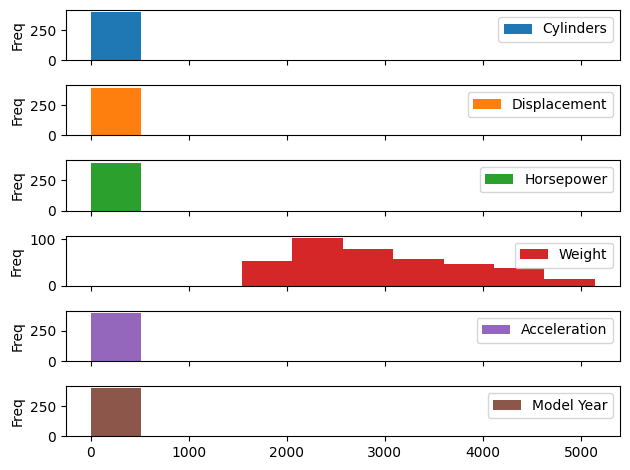

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,13))
axs = clean_df.iloc[:,1:7].plot.hist(subplots=True, legend=True)
for ax in axs.flatten():
    ax.set_ylabel('Freq')
plt.tight_layout()
plt.show()

Es una buena práctica normalizar funciones que utilizan diferentes escalas y rangos. Las redes MLP son susceptibles a las distintas escalas de valores de features. Aunque el modelo *podría* converger sin normalización de features, esto suele dificultar el entrenamiento.

**Observaciones**:
1. Aunque sólo entrenamos el escalador con el conjunto de datos de entrenamiento, este escalador también se utilizará para normalizar el conjunto de datos de prueba. **Recordar el data leakege**.
2. El reescalamiento debe aplicarse a cualquier otro dato que entre al modelo, junto con la codificación de un punto que hicimos anteriormente. Eso incluye el conjunto de pruebas, así como los datos en vivo cuando el modelo se usa en producción.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

## El modelo

### Construcción del modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `Sequential` con dos capas ocultas y una capa de salida que devuelve un único valor continuo.

Observa la elección de optimizador, métricas de rendimiento, función de costo y funciones de activación.

<br>

Una guía general sobre funciones de perdida y métricas

<br>

| Aplicación                     | Función de Pérdida (Loss)          | Métrica usual           | Última capa (output layer)          |
|---------------------------------|------------------------------------|-------------------------|-------------------------------------|
| Clasificación binaria          | `binary_crossentropy`              | `accuracy`              | `Dense(1, activation='sigmoid')`    |
| Clasificación multiclase       | `categorical_crossentropy`         | `accuracy`              | `Dense(num_clases, activation='softmax')` |
| Regresión (un valor)           | `mean_squared_error` (MSE)         | `mse` o `mae`           | `Dense(1, activation='linear')`     |
| Regresión (múltiples valores)  | `mean_squared_error` (MSE)         | `mse` o `mae`           | `Dense(num_valores, activation='linear')` |

<br>

---
<br>

Una guía general sobre optimizadores:

<br>

| Optimizador  | Ventajas                             | Casos de Uso Típicos         | Parámetros Clave               |
|--------------|--------------------------------------|------------------------------|--------------------------------|
| **Adam**     | Convergencia rápida, adaptable      | Default para MLPs, CNN, RNN  | `lr`  |
| **SGD**      | Mayor control, estable con momentum | Problemas convexos, fine-tuning | `lr`, `momentum`      |
| **RMSprop**  | Bueno para datos ruidosos           | RNNs, problemas inestables    | `lr`, `rho`          |

<br>


Podemos definir directamente el modelo, como en la notebook pasada.

Observemos los nombres del modelo y capas.

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import RMSprop
import keras.backend as K

# Limpiar el backend antes de crear el modelo
K.clear_session()

model = Sequential(name='MLP_Regression')
model.add(Input(shape=(X_train_scl.shape[1],),name='Entrada'))
model.add(Dense(64, activation='relu',name='Oculta_1'))
model.add(Dense(64, activation='relu',name='Oculta_2'))
model.add(Dense(1, activation=None,name='Salida'))

#--------- Probemos otro optimizador --------------
optimizer = RMSprop(learning_rate=0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae'])

⚡ Podemos también definirlo por medio de una función para generar nuevos modelos similares posteriormente:

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import RMSprop
import keras.backend as K

def build_model():
    K.clear_session()
    model = Sequential(name='MLP_Regression')
    model.add(Input(shape=(X_train_scl.shape[1],),name='Entrada'))
    model.add(Dense(64, activation='relu',name='Oculta_1'))
    model.add(Dense(64, activation='relu',name='Oculta_2'))
    model.add(Dense(1, activation=None,name='Salida'))
    optimizer = RMSprop(learning_rate=0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

### Inspeccionemos el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [12]:
model.summary()

Model: "MLP_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Oculta_1 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Oculta_2 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

### 🔽 Acerca de la inicialización de los pesos

Observemos que ya podríamos realizar predicciones con el modelo sin entrenar. Es decir, los pesos están inicializados

Tomamos un *batch* de 10 ejemplos de los datos de entrenamiento y realizamos las predicciones.

In [44]:
example_batch = X_train_scl[:10]
example_predictions = model.predict(example_batch)
example_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[ 0.17862648],
       [-0.02236272],
       [ 0.00715367],
       [-0.05592286],
       [ 0.00049722],
       [ 0.1899702 ],
       [ 0.22231278],
       [ 0.2128768 ],
       [ 0.13718683],
       [ 0.10493674]], dtype=float32)

Podríamos medir su error MSE, o cualquier otra métrica de rendimiento.

In [45]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train[:10],example_predictions)

361.9692148992343

### Entrenamos el modelo

Entrenamos el modelo durante 100 épocas, registramos la precisión de entrenamiento y validación en el objeto `history`.

*El entrenamiendo debería durar alrededor de 1 minuto.*

In [50]:
n_epocas = 100

history = model.fit(
                    X_train_scl, y_train,
                    epochs=n_epocas,
                    validation_split = 0.15,
                    verbose=0)

Podríamos visualizar la historia del entrenamiento durante cada época en un dataframe usando las estadísticas almacenadas en el diccionario `history.history`.

Realizaremos algunas manipulaciones adicionales con las historia del entrenamiento. Por ejemplo, podemos acomodarlo en dataframe

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df.tail()

,loss,mae,val_loss,val_mae,epoch
145,5.015512,1.680324,8.204829,1.893714,145
146,5.241941,1.704090,8.445565,1.911400,146
147,4.995945,1.681714,8.859675,1.869416,147
148,5.027106,1.678701,9.578979,1.911238,148
149,4.979309,1.667597,9.860775,1.977929,149


Definimos la siguiente función para graficar las métricas de rendimiento durante el entrenamiento.

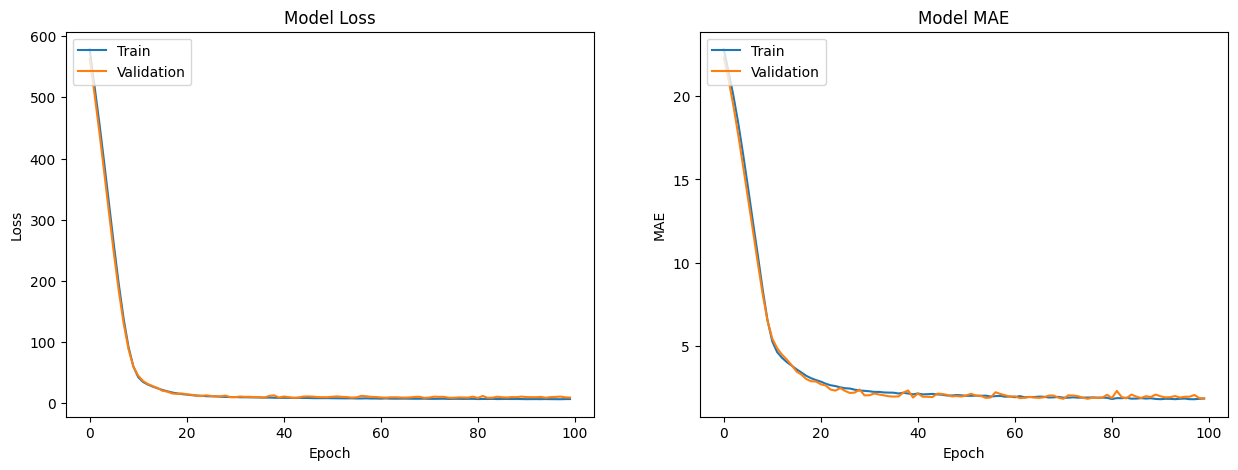

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')
axs[1].plot(history.history['mae'])
axs[1].plot(history.history['val_mae'])
axs[1].set_title('Model MAE')
axs[1].set_ylabel('MAE')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper left')
fig.show()

🔵 ¿Cómo se ve el entrenamiento?

### Métricas de rendimiento

Veamos qué tan bien generaliza el modelo al usar el **conjunto de prueba**, el cual no fue usado para entrenar el modelo. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real.

In [39]:
import numpy as np

loss, mae = model.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

2/2 - 0s - 26ms/step - loss: 12.2315 - mae: 2.4105
MAE para las predicciones en el conjunto de prueba: 2.4105 MPG


### Predicciones

Finalmente, predecimos los valores de MPG utilizando los datos del conjunto de prueba

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


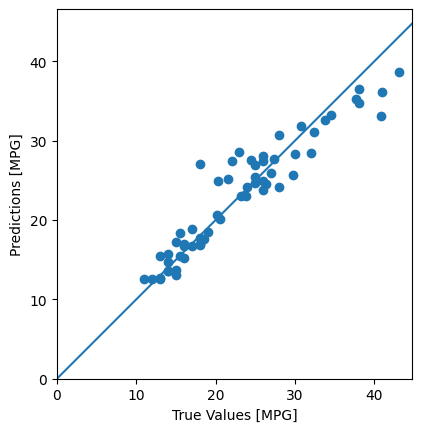

In [19]:
y_pred = model.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()

Veamos la distribución de errores.

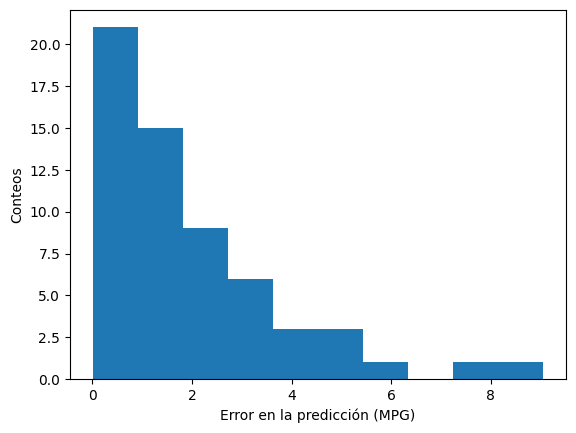

In [20]:
errores = np.abs(y_test-y_pred)

plt.hist(errores)
plt.xlabel("Error en la predicción (MPG)")
plt.ylabel("Conteos")
plt.show()

## ⭕ Práctica

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)

# X_df = df.iloc[:,1:]
y = df['MPG'].values

X_train_df, X_test_df, y_train, y_test = train_test_split(df,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train_df.shape[0]}")
print(f"Test size: {X_test_df.shape[0]}")

#--------- IMPUTACIÓN DE VALORES ------------------
imputer = SimpleImputer(strategy='mean')
X_train_df = pd.DataFrame(imputer.fit_transform(X_train_df),
                        columns=df.columns)
X_train_df['Origin'] = X_train_df['Origin'].astype(int)
X_test_df = pd.DataFrame(imputer.transform(X_test_df),
                        columns=df.columns)
X_test_df['Origin'] = X_test_df['Origin'].astype(int)

#-------- EXTRACCIÓN DE DATOS ------------------
X_train = X_train_df.iloc[:,1:].values
X_test = X_test_df.iloc[:,1:].values

Train size: 336
Test size: 60


Definimos la función para construir e inicializar (compilar) el modelo con la misma arquitectura siempre

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import RMSprop
import keras.backend as K
import matplotlib.pyplot as plt

def build_model(input_shape,output_activation=None):
    K.clear_session()  # Para limpiar las variables
    model = Sequential(name='MLP_Regression')
    model.add(Input(shape=input_shape,name='Entrada'))
    model.add(Dense(64, activation='relu',name='Oculta_1'))
    model.add(Dense(64, activation='relu',name='Oculta_2'))
    model.add(Dense(1, activation=output_activation,name='Salida'))
    optimizer = RMSprop(learning_rate=0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

def graficar_historial(history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    axs[1].plot(history.history['mae'])
    axs[1].plot(history.history['val_mae'])
    axs[1].set_title('Model Recall')
    axs[1].set_ylabel('Recall')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    fig.show()

Realiza las siguientes tareas. En las primeras 5 tareas el objetivo es experimentar y reflexionar sobre el efecto de distintos aspectos del entrenamiento en el rendimiento del modelo.

1. Repite el entrenamiendo del modelo usando 100 épocas **sin normalizar los datos**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?







Model: "MLP_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Oculta_1 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Oculta_2 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

2/2 - 0s - 28ms/step - loss: 84.4200 - mae: 7.9965
MAE para las predicciones en el conjunto de prueba: 7.9965 MPG


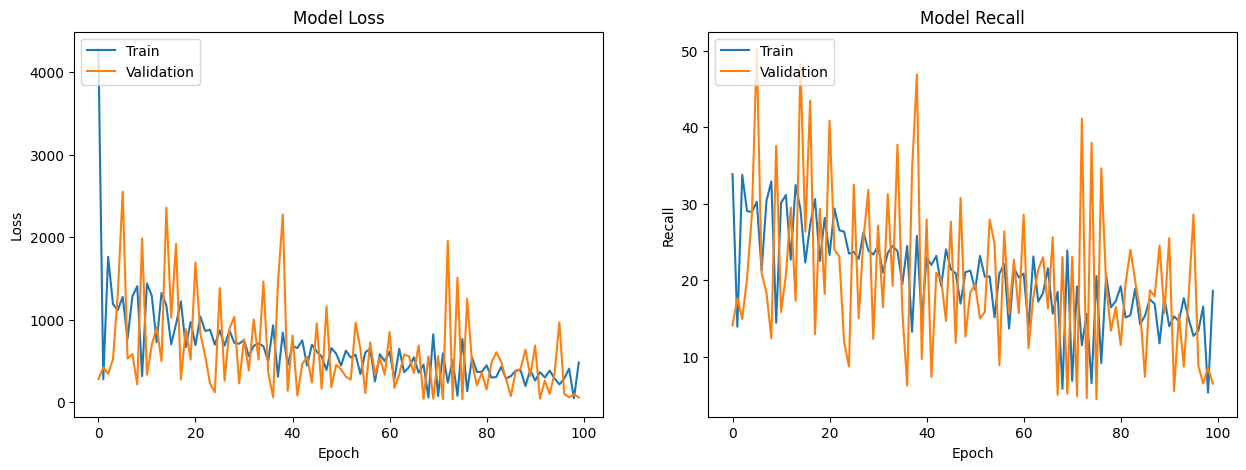

In [29]:
model = build_model(input_shape=(X_train.shape[1],))
model.summary()

history = model.fit(
          X_train, y_train,
          epochs=100,
          validation_split = 0.15,
          verbose=0)

graficar_historial(history)
_, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f"MAE para las predicciones en el conjunto de prueba: {round(test_mae,4)} MPG")

2. 🟢 Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con alguna función de activación en la capa de salida (tanh o sigmoide)**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?



Recordemos que el rango de la variable target es:

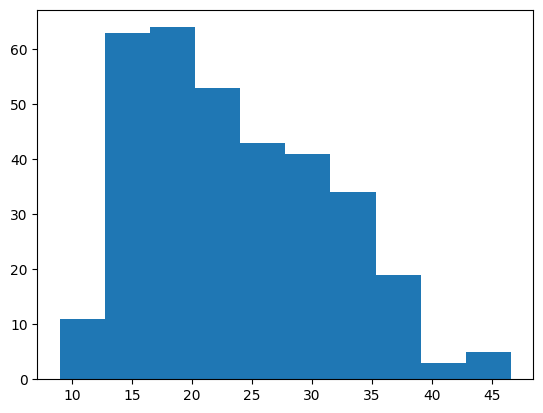

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(y_train)
plt.show()

Model: "MLP_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Oculta_1 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Oculta_2 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

2/2 - 0s - 27ms/step - loss: 555.2867 - mae: 22.1033
MAE para las predicciones en el conjunto de prueba: 22.1033 MPG


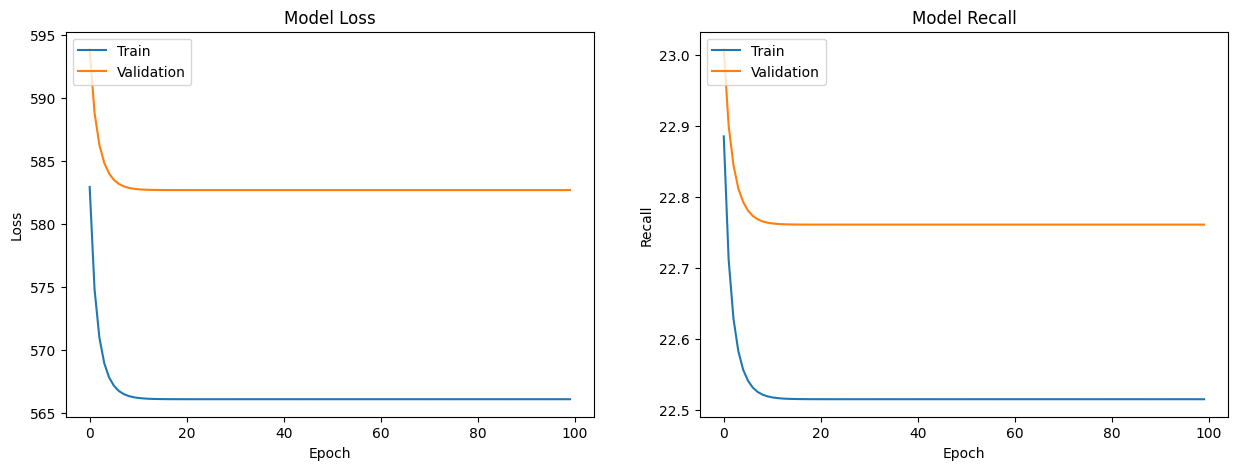

In [32]:
from sklearn.preprocessing import StandardScaler

normalizar = True

if normalizar:
    scaler = StandardScaler()
    X_train_scl = scaler.fit_transform(X_train)
    X_test_scl = scaler.transform(X_test)
else:
    X_train_scl = X_train.copy()
    X_test_scl = X_test.copy()

model = build_model(input_shape=(X_train.shape[1],),
                    output_activation='sigmoid')
model.summary()

history = model.fit(
          X_train_scl, y_train,
          epochs=100,
          validation_split = 0.15,
          verbose=0)

graficar_historial(history)
_, test_mae = model.evaluate(X_test_scl, y_test, verbose=2)
print(f"MAE para las predicciones en el conjunto de prueba: {round(test_mae,4)} MPG")

3. 🔴 Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con la función de activación ReLU en la capa de salida**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?



Model: "MLP_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Oculta_1 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Oculta_2 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

2/2 - 0s - 45ms/step - loss: 8.8687 - mae: 2.0671
MAE para las predicciones en el conjunto de prueba: 2.0671 MPG


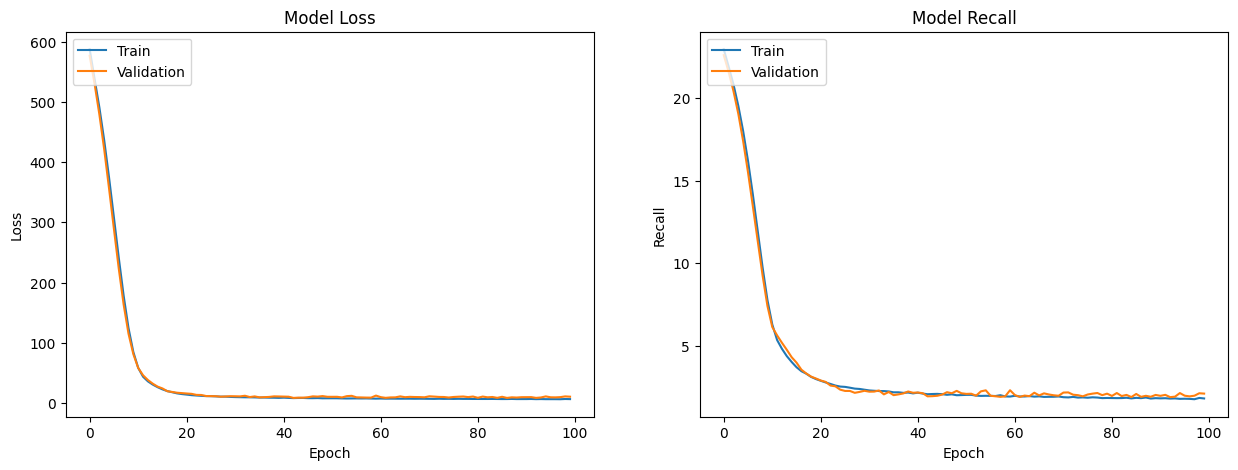

In [46]:
from sklearn.preprocessing import StandardScaler

normalizar = True

if normalizar:
    scaler = StandardScaler()
    X_train_scl = scaler.fit_transform(X_train)
    X_test_scl = scaler.transform(X_test)
else:
    X_train_scl = X_train.copy()
    X_test_scl = X_test.copy()

model = build_model(input_shape=(X_train.shape[1],),
                    output_activation='relu')
model.summary()

history = model.fit(
          X_train_scl, y_train,
          epochs=100,
          validation_split = 0.15,
          verbose=0)

graficar_historial(history)
_, test_mae = model.evaluate(X_test_scl, y_test, verbose=2)
print(f"MAE para las predicciones en el conjunto de prueba: {round(test_mae,4)} MPG")

4. 🟢 Compara el modelo que entrenamos en la notebook (con 100 épocas, normalización y sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
 * Regresión Lineal
 * Regresión Polinomial
 * Regresor KNN

 Compara los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño?  



In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE para las predicciones en el conjunto de prueba: {round(mae,4)} MPG")

MAE para las predicciones en el conjunto de prueba: 1.976 MPG


🔴 El objetivo en la siguiente tarea es experimentar para encontrar un mejor modelo que suba las métricas de rendimiento del modelo. **Cuidado con el overfitting.**

5. Usando los datos normalizados, prueba con diferentes combinaciones de los diferentes parámetros del módelo. Concretamente, crea un modelo donde cambies:
    * Número de capas ocultas
    * Número de neuronas en las capas ocultas
    * Funciones de activación de las capas ocultas
    * Optimizador y tasa de entrenamiento
    * Batch size

 Puedes hacer el modelo más sencillo o más complejo. Reporta la combinación de parámetros que produjo el mejor resultado.

## Conclusiones

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión. Otra métrica de regresión común es el error absoluto medio (MAE).
* Cuando las features de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, es preferible usar una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* El entrenamiento con pocas épocas es una técnica útil para evitar el sobreajuste. Otra técnica es el *early stopping* (coming soon...).